In [89]:
%load_ext autoreload
%autoreload 2

from fundusClassif.data.data_factory import get_datamodule_from_config
from nntools.utils import Config
from fundusClassif.utils.images import get_preprocessing
from fundus_data_toolkit.datamodules import DataHookPosition

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/florian/miniconda3/envs/DL/lib/python3.12/site-packages/nntools/dataset/classif_dataset.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(self.file_column, inplace=True)


Train 28101 Val 7025 Test 53575
Train 2930 Val 732 <fundus_data_toolkit.datamodules.classification.IDRiDDataModule object at 0x72502cfbd1f0>
Train 331 Val 82 Test 103
Train 6260 Val 2503 Test 3759


/home/florian/miniconda3/envs/DL/lib/python3.12/site-packages/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


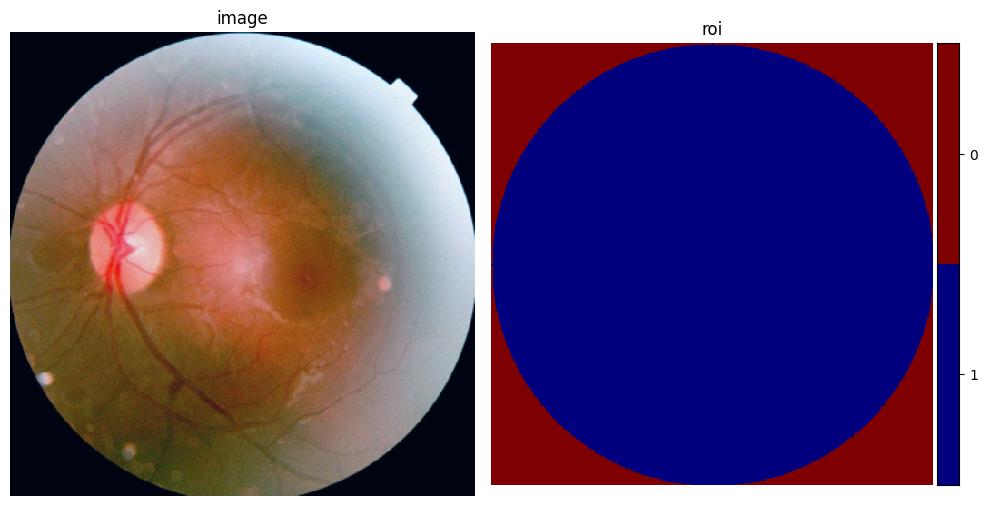

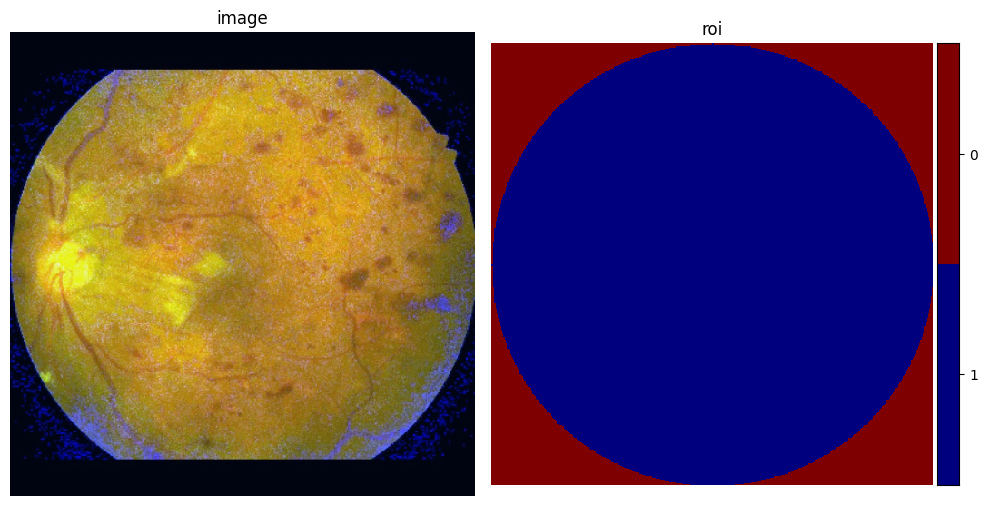

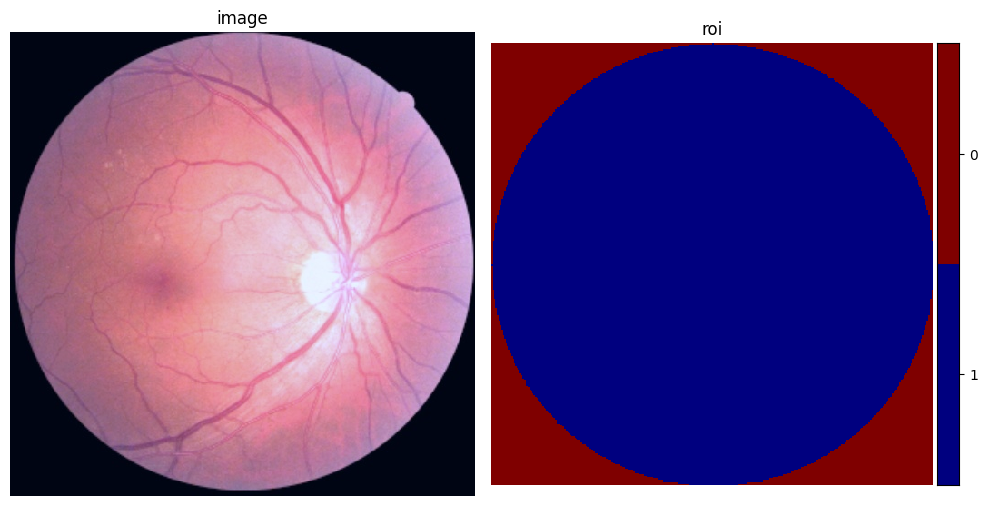

In [90]:
config = Config('../configs/config.yaml')
config

config["data_preprocessing"]["name"] = "autobalance"
config["data"]["data_augmentation_type"] = None
if config["data_preprocessing"]["name"] != "absent":
        config["data"]["cache_dir"] = config["data_preprocessing"]["name"]

        
        prepro_function = get_preprocessing(config["data_preprocessing"]["name"])

datamodule = get_datamodule_from_config(config['datasets'], config['data'])
dataloader = datamodule.train_dataloader()
dataloader_valid = datamodule.val_dataloader()
test_dataloader = datamodule.test_dataloader()
test_datasets_ids = [d.dataset.id for i, d in enumerate(test_dataloader)]


#print(f"Train dataset size: {len(dataloader.dataset)}")
#print(f"Valid dataset size: {len(dataloader_valid.dataset)}")
#print(f"Test datasets ids: {test_datasets_ids}")

if config["data_preprocessing"]["name"] != "absent":
        datamodule.set_data_pipeline_hook(prepro_function, position=DataHookPosition.POST_RESIZE_PRE_CACHE)

#datamodule.train.plot(9)

#parcourt l'ensemble des images du jeu de test et affiche une image de chaque dataset
for i, d in enumerate(test_dataloader):
    d.dataset.plot(0)
